In [2]:
def plotHistogram(imageFilename):
    import cv2
    import numpy as np
    from matplotlib import pyplot as plt

    img = cv2.imread(imageFilename)
    color = ('b','g','r')
    plt.figure(figsize=(6,4.5))
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([1,255])
        plt.ylim([0,450])     
    plt.show()
    


In [4]:
def plotImage(imageFilename):
    from IPython.display import Image, display
    display(Image(imageFilename))
    

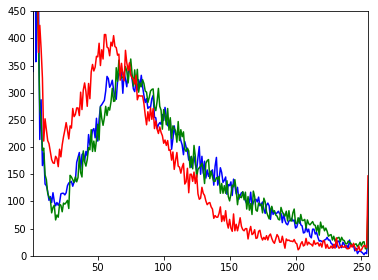

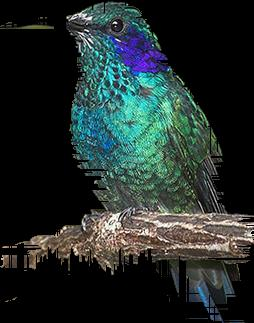

In [5]:
def getPlots():
    imageList = {0:'Vermilion_Flycatcher_0052_42551.jpg', 1:'Cardinal_0103_17425.jpg', 
                 2:'Mockingbird_0006_79819.jpg', 3:'Green_Violetear_0032_795707.jpg', 
                 4:'Purple_Finch_0098_27280.jpg', 5:'Vermilion_Flycatcher_0072_42218.jpg', 
                 6:'Lazuli_Bunting_0042_14820.jpg'}
    
    img = imageList[3]
    plotHistogram(img)
    plotImage(img)
    

getPlots()

In [103]:
def printCorr():
    import cv2
    import numpy as np
    from scipy.stats.stats import pearsonr
    from matplotlib import pyplot as plt

    imageList = {0:'Vermilion_Flycatcher_0052_42551.jpg', 1:'Cardinal_0103_17425.jpg', 
                 2:'Mockingbird_0006_79819.jpg', 3:'Green_Violetear_0032_795707.jpg', 
                 4:'Purple_Finch_0098_27280.jpg', 5:'Vermilion_Flycatcher_0072_42218.jpg', 
                 6:'Lazuli_Bunting_0042_14820.jpg'}
    
    img1 = cv2.imread(imageList[0])
    color = ('b','g','r')
    results = []
    for i in range(1,7):
        img2 = cv2.imread(imageList[i])
        fname = imageList[i][:imageList[i].find('_0')]
        indiv = []
        for j,col in enumerate(color):
            hist1 = cv2.calcHist([img1],[j],None,[256],[0,256])
            hist2 = cv2.calcHist([img2],[j],None,[256],[0,256])
            indiv.append(pearsonr(hist1.tolist()[1:],hist2.tolist()[1:])[0])
        results.append([np.mean(indiv),fname])
        
    for member in sorted(results,reverse=True):
        print ("%s" % member)
        
printCorr()

[0.7288931202122978, 'Vermilion_Flycatcher']
[0.69004740152677668, 'Cardinal']
[0.67008346898714422, 'Lazuli_Bunting']
[0.63093785953737036, 'Purple_Finch']
[0.60515547035305484, 'Green_Violetear']
[0.46890737269082833, 'Mockingbird']
